In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    #pyplot is a plotting library used for 2D graphics in python 
#  %matplotlib inline
import seaborn as sns              # It is a Python data visualization library based on matplotlib.
import warnings
warnings.filterwarnings("ignore")

In [2]:
ad = pd.read_csv("bank-additional-full.csv", na_values =['NA'],sep=';')
df = ad.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#example

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


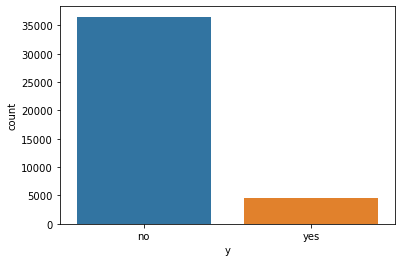

In [3]:
sns.countplot(x='y', data=df);        #highly imbalanced dataset 

In [17]:

var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
df.replace('unknown', np.NaN, inplace=True)

In [18]:
df.isnull().sum()/len(df)*100  #Finding out the percentage of missing values in each column in the given dataset

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Job


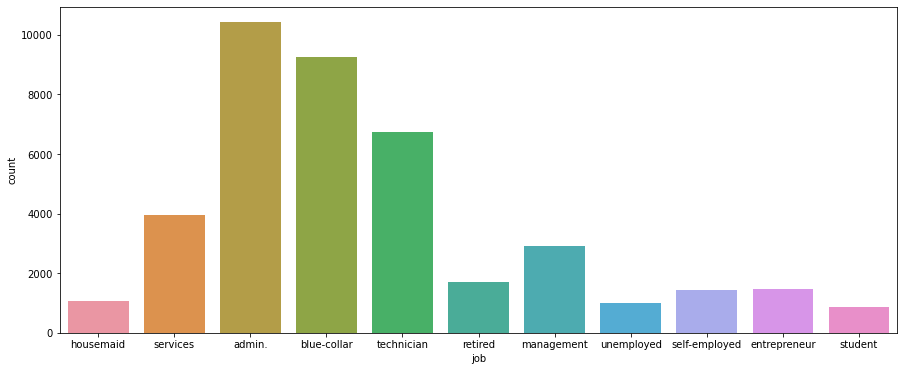

Marital


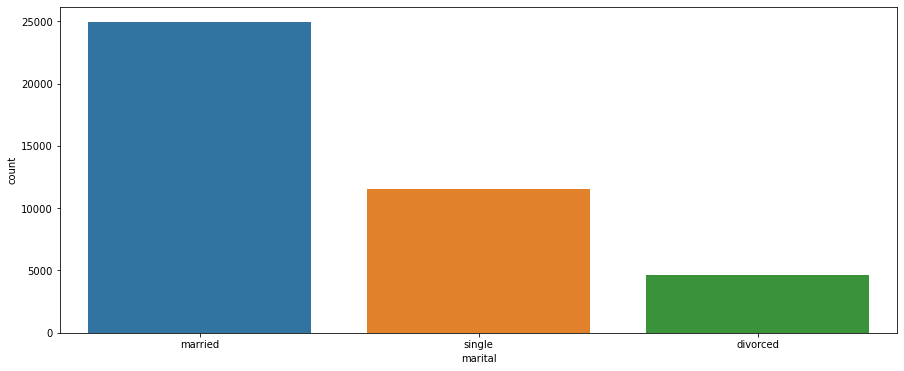

Education


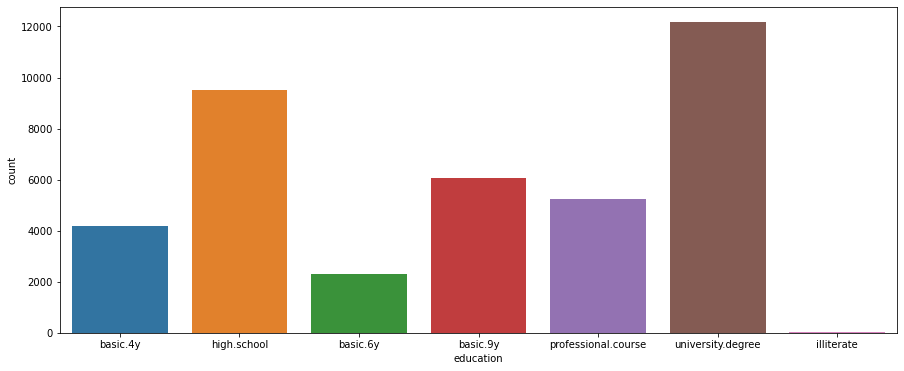

Default


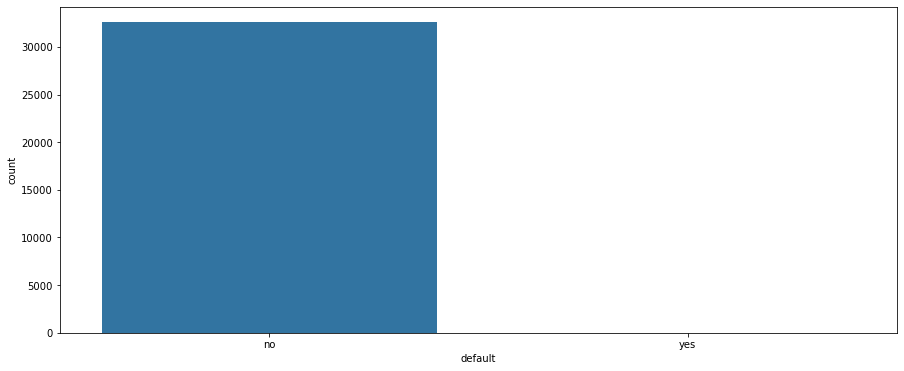

Housing


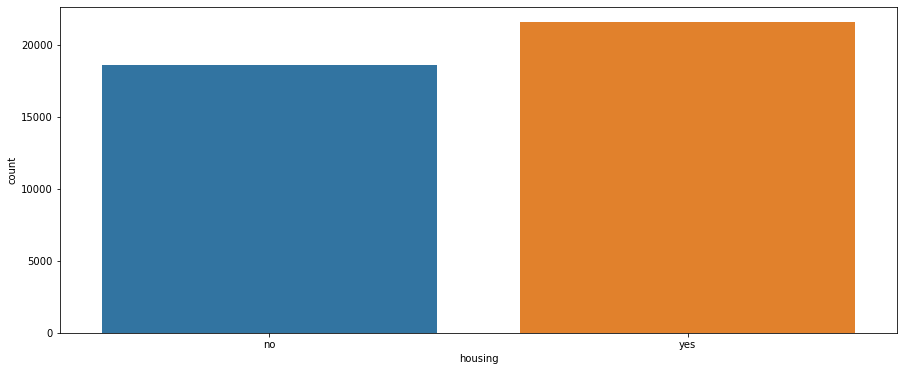

Loan


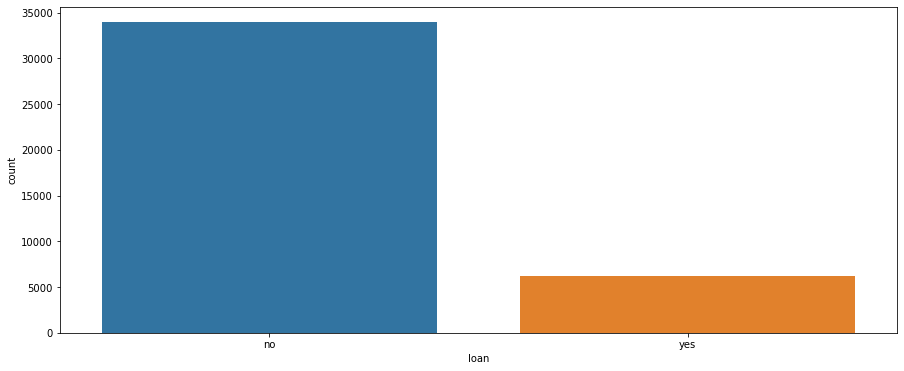

Contact


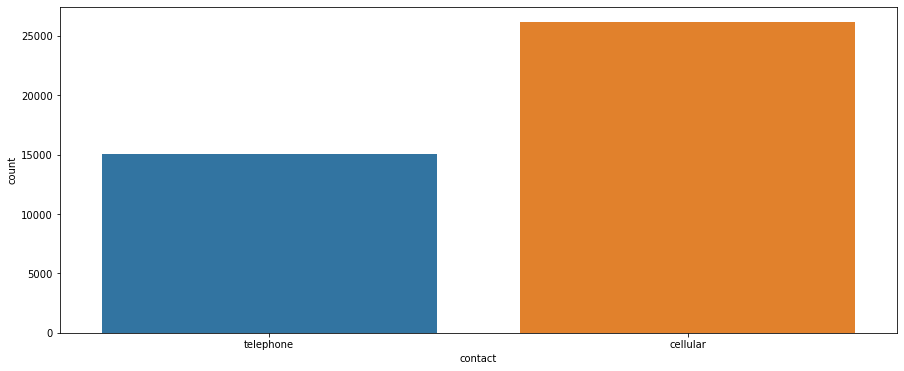

Month


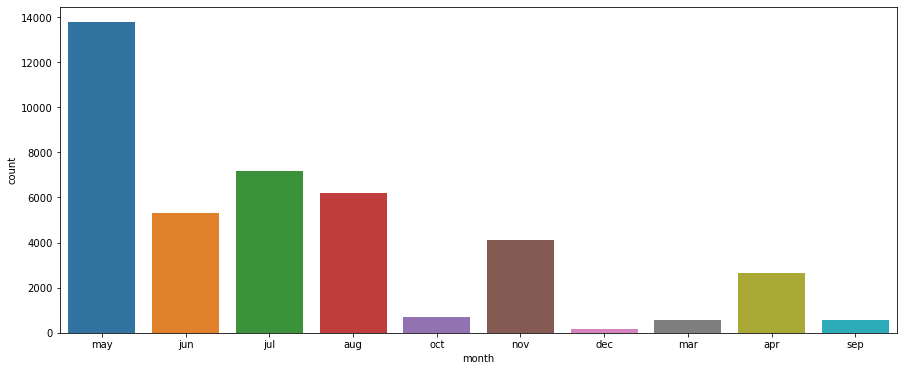

Day_Of_Week


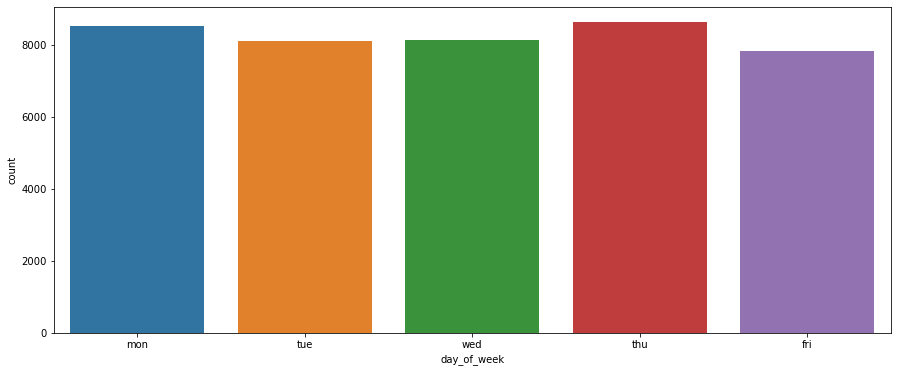

Poutcome


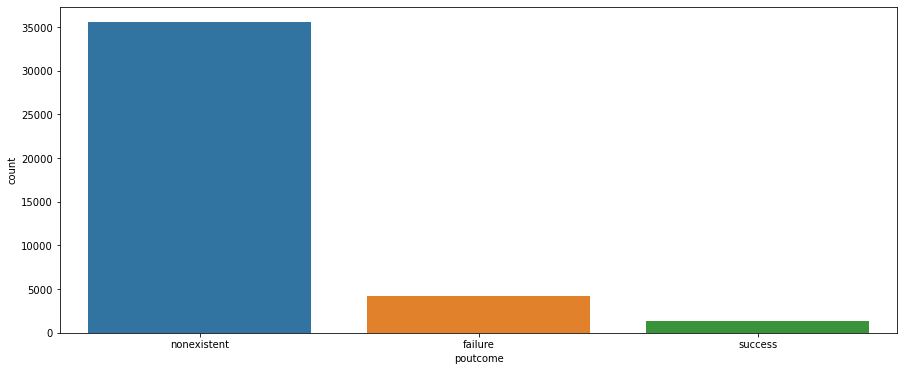

In [15]:
for column in var_categorical:
    plt.figure(figsize=(15,6))
    print(column.title())
    sns.countplot(x = df[column])
    plt.show()

In [19]:
# Default variable has no impact on the client subscribing for term deposit.
df.drop(["default"], axis = 1, inplace=True)
var_categorical = list(set(var_categorical)- set(["default"]))


1. Job: Highest Number (around 25%) of application are from admin type of job.
2. Default: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
3. Marital: Around 60% of client were approached were married. 
4. Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)
5. Housing: Housing loan does not have much effect on the number of term deposit purchased.
6. Loan: We approach around 84% of client with not having personal loan. 
7. Contact: Around 64% calls are from cellular.
8. Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 
9. day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
10. poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [20]:
df.dropna(inplace = True) #Dropping null values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  cons.price.idx  30488 non-null  float64
 15  cons.conf.idx   30488 non-null  float64
 16  euribor3m       30488 non-null  float64
 17  y               30488 non-null 

In [21]:
duration = df["duration"]
df.drop(["duration"], axis =1, inplace = True)

In [22]:
var_numerical = list(set(var_numerical) - set(['duration']))

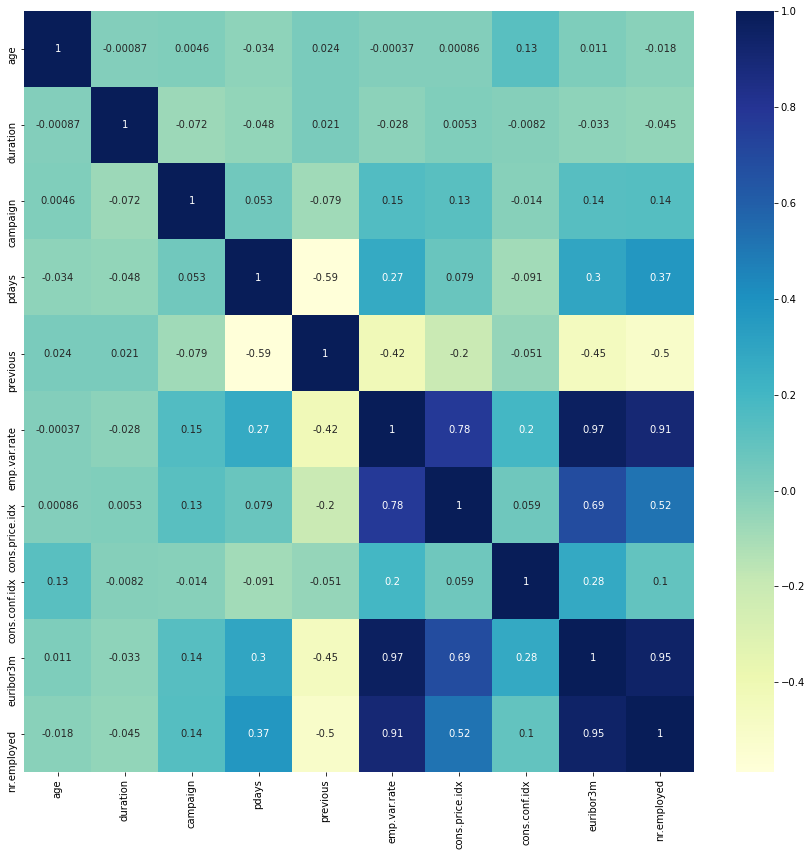

In [16]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

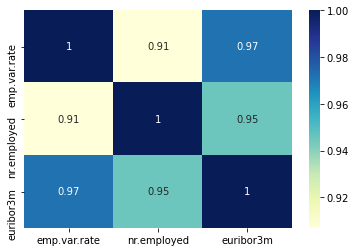

In [17]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap="YlGnBu")
plt.show()
#Positive high correlation between:
# 1. 'emp.var.rate' and 'nr.employed'
# 2. 'emp.var.rate' and 'euribor3m'
# 3. 'euribor3m' and 'nr.employed'

In [23]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

In [48]:
df[var_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000


In [10]:
#During this campaign and if the number of contacts made for this customer is more than 23, there is a very high probability that the customer will NOT subscribe to the time deposit.
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [50]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))

3020 29178
839 1310
839 1310
832 1302


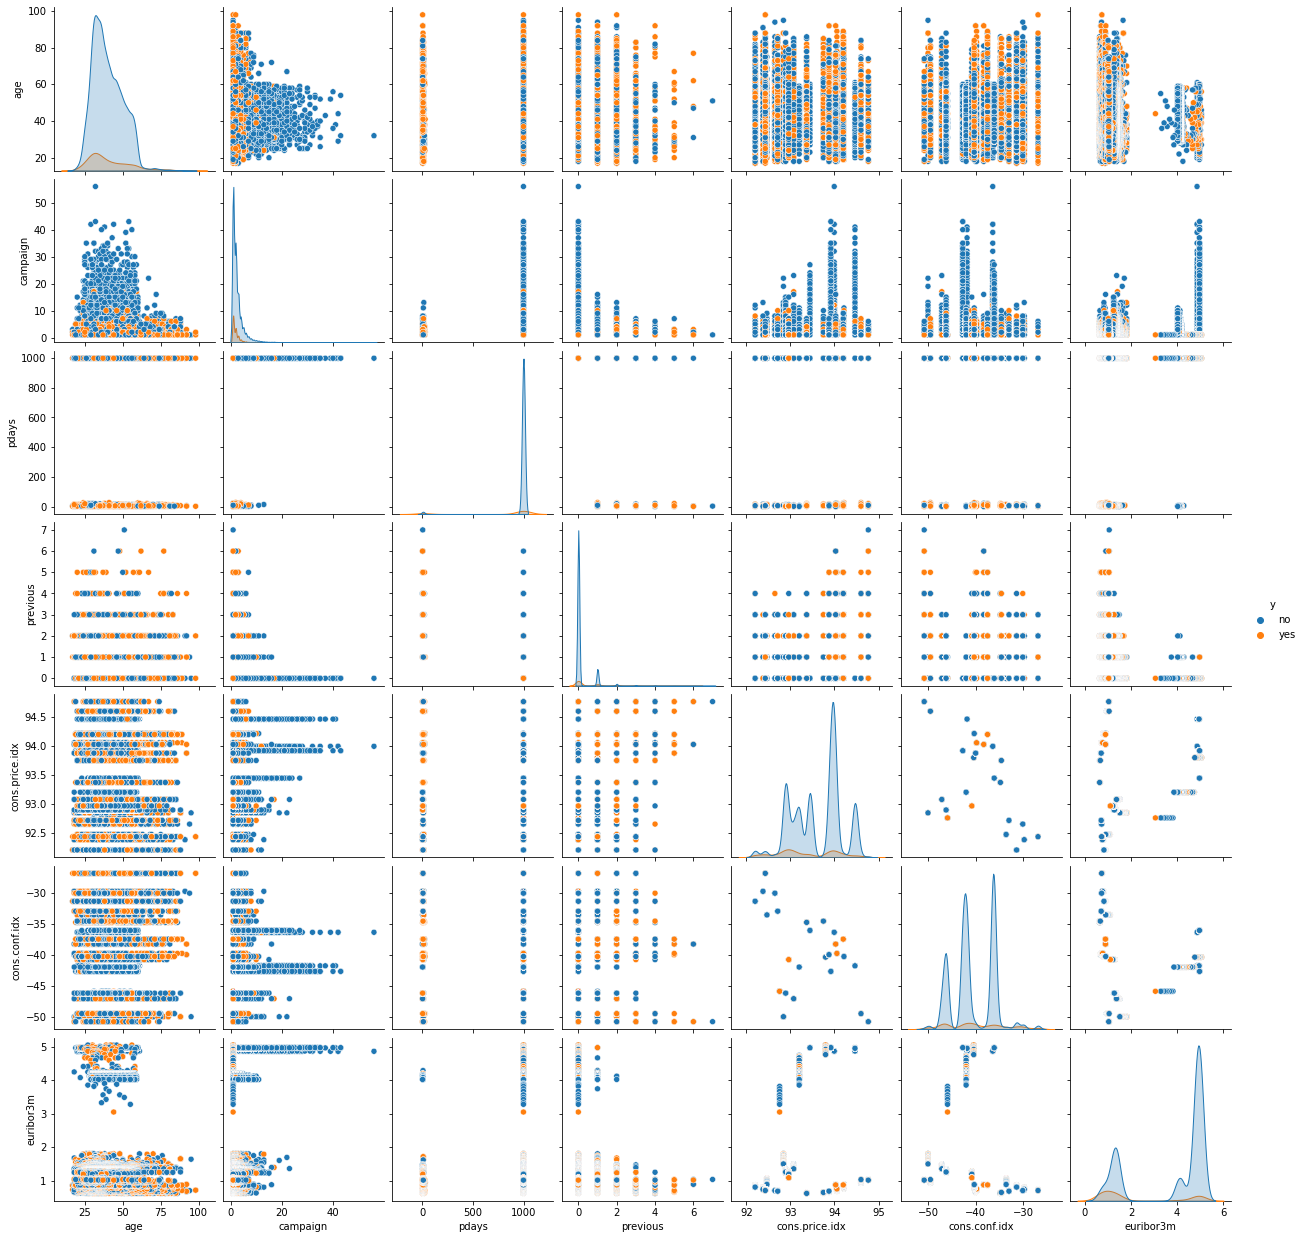

In [47]:
sns.pairplot(hue='y', data = df)
plt.show()

In [24]:
df.drop(['campaign'], axis = 1, inplace=True) #We drop this value because we cannot know it beforehand.
var_numerical = list(set(var_numerical) - set(['campaign']))

In [25]:
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

In [14]:
print(df["loan"].value_counts())
print(df["housing"].value_counts())
print(df["contact"].value_counts())
print(df["y"].value_counts())

no     32286
yes     5959
Name: loan, dtype: int64
yes    20578
no     17667
Name: housing, dtype: int64
cellular     24441
telephone    13804
Name: contact, dtype: int64
no     33987
yes     4258
Name: y, dtype: int64


In [26]:
temp = ['loan', 'housing', 'y']

df[temp] = df[temp].apply(lambda x: x.map({'yes':1, 'no': 0}))

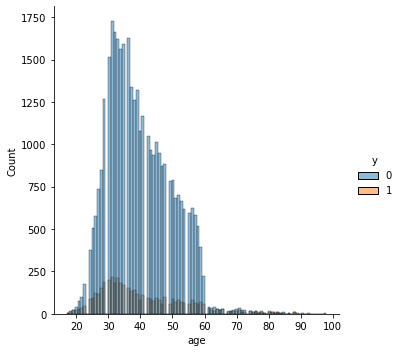

In [79]:
sns.displot(x = 'age', hue='y', data=df)
plt.show()

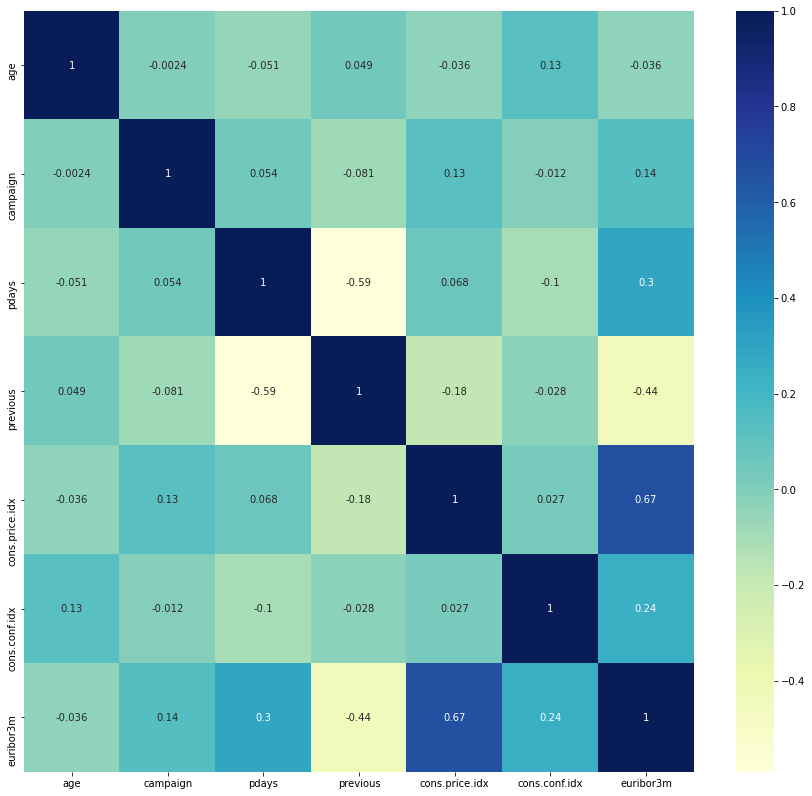

In [28]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [27]:
contact = pd.get_dummies(df.contact, drop_first=True)       #Since we have a small number of dummies, we drop the first dummy.
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [49]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,999,0,nonexistent,93.994,-36.4,4.857,0
1,57,services,married,high.school,0,0,telephone,may,mon,999,0,nonexistent,93.994,-36.4,4.857,0
2,37,services,married,high.school,1,0,telephone,may,mon,999,0,nonexistent,93.994,-36.4,4.857,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,999,0,nonexistent,93.994,-36.4,4.857,0
4,56,services,married,high.school,0,1,telephone,may,mon,999,0,nonexistent,93.994,-36.4,4.857,0


In [28]:
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()


,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,999,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,0,0,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,1,0,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,999,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,0,1,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0


In [29]:
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,0,0,0,0
1,57,0,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,1,0,0,0
3,40,0,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,1,0,0,0,0,0
4,56,0,1,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,1,0,0,0


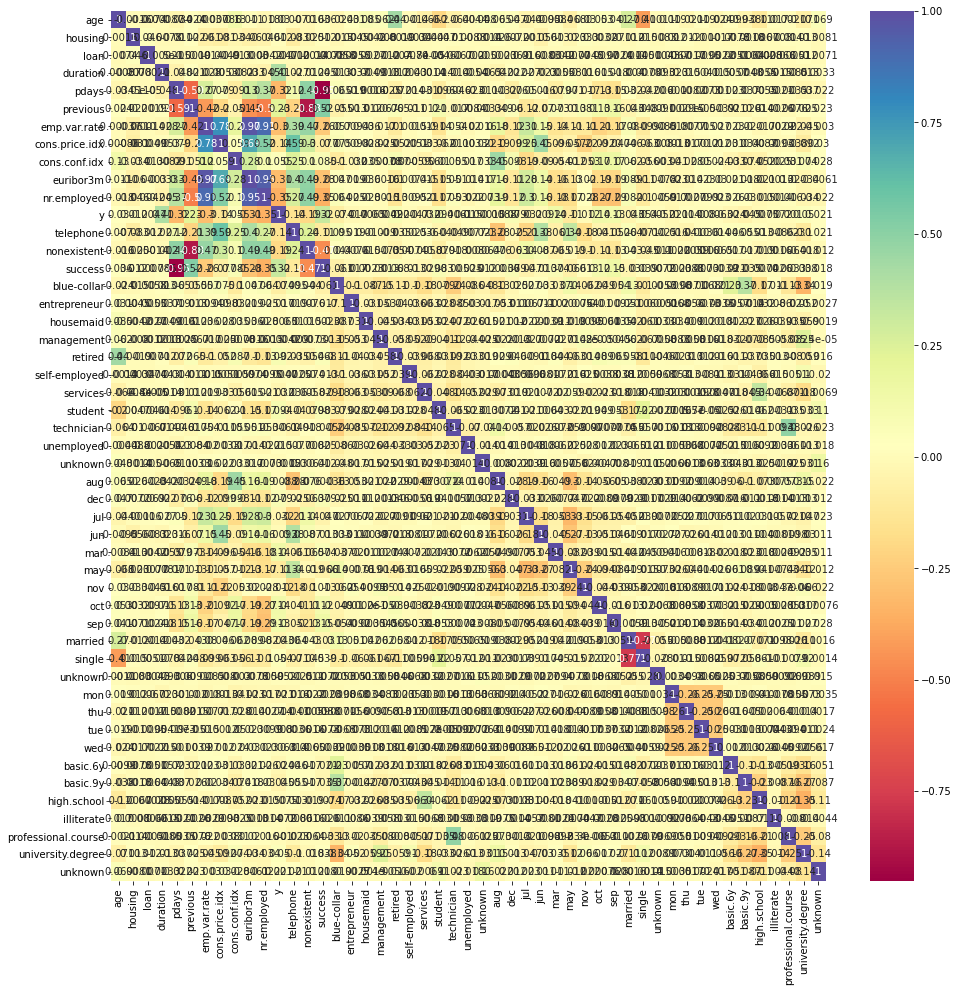

In [117]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

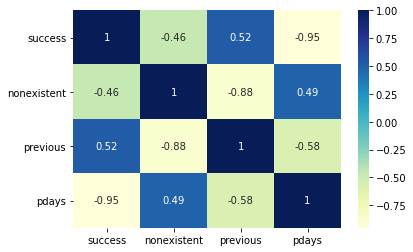

In [30]:
sns.heatmap(df[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap="YlGnBu")
plt.show()
#Negative Correlation: Previous vs Nonexistent    and    Pdays vs Success

In [31]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [32]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

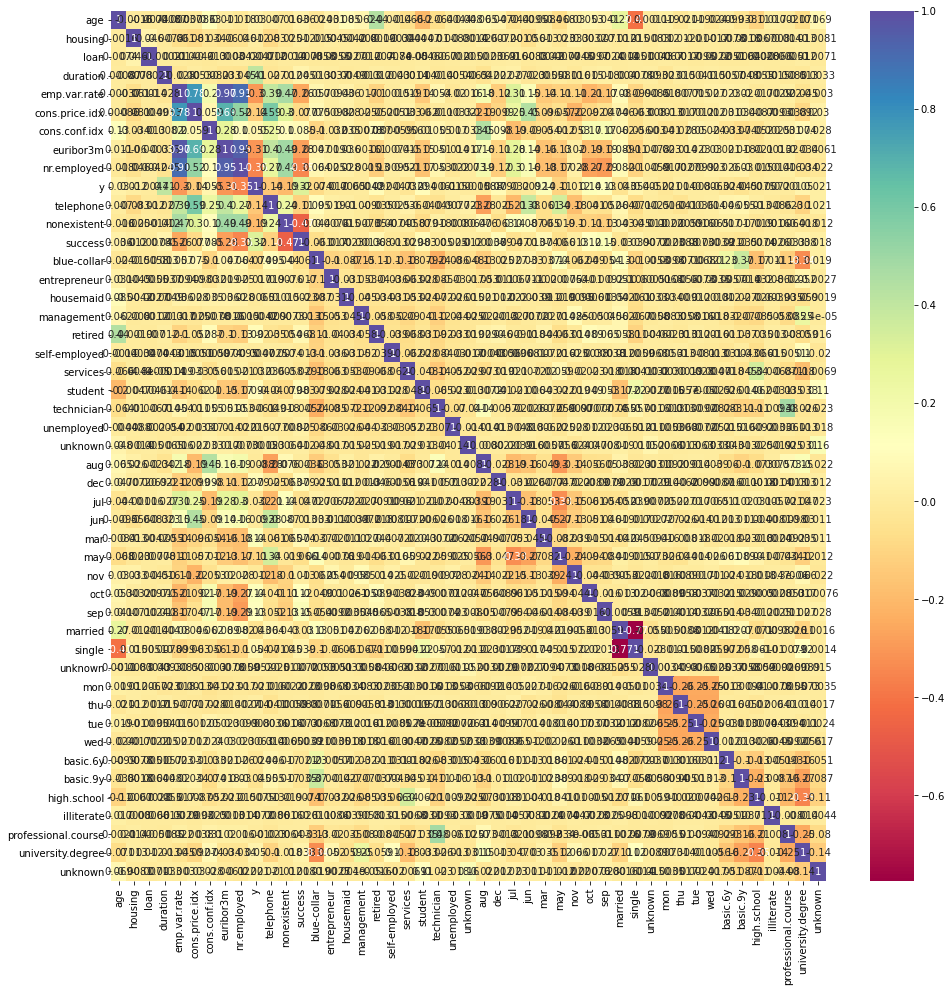

In [124]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [54]:
df.corr()['y']

age                    0.030130
housing                0.009996
loan                  -0.005603
cons.price.idx        -0.133084
cons.conf.idx          0.051424
euribor3m             -0.300580
y                      1.000000
telephone             -0.140866
nonexistent           -0.184489
success                0.311555
blue-collar           -0.071404
entrepreneur          -0.015897
housemaid             -0.006232
management             0.000090
retired                0.089646
self-employed         -0.001888
services              -0.032759
student                0.082182
technician            -0.006091
unemployed             0.016334
aug                   -0.012077
dec                    0.075847
jul                   -0.030556
jun                   -0.007129
mar                    0.144351
may                   -0.104725
nov                   -0.013458
oct                    0.142853
sep                    0.123514
married               -0.040845
single                 0.050106
mon     

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

In [33]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [34]:
#Rescaling the continuous variables 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [62]:
df_train.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
17301,0.098765,1,1,0.669135,0.338912,0.981183,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26425,0.407407,1,0,0.389322,0.368201,0.780322,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
38271,0.111111,1,0,0.089634,1.000000,0.024484,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
24709,0.382716,1,0,0.389322,0.368201,0.806393,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2160,0.148148,1,0,0.698753,0.602510,0.957379,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [104]:
df_test.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
19269,0.407407,0,1,0.484412,0.615063,0.982317,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
17957,0.358025,0,0,0.669135,0.338912,0.980957,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
22711,0.506173,0,0,0.484412,0.615063,0.981637,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20420,0.395062,1,0,0.484412,0.615063,0.982090,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
38658,0.246914,0,0,0.174591,0.866109,0.019270,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [35]:
y_train = df_train.pop('y')
X_train = df_train
y_test = df_test.pop('y')
X_test = df_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30596, 40), (30596,), (7649, 40), (7649,))

In [36]:
#imbalanced oldugu için AUC tercih ediyoruz.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [37]:
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs
                                               )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs
                                               )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )  #roc_auc_score tells you the area under the roc curve
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [38]:
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid

#Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. 


In [39]:
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [44]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, X_train, y_train, X_test, y_test)

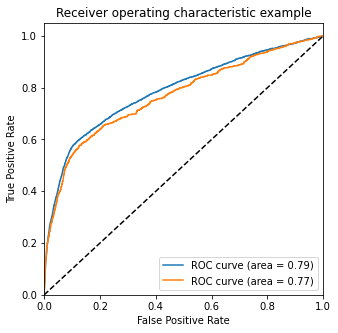

In [45]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [46]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.899660086285789
Accuracy test:  0.9039090077134266


In [31]:
from sklearn.feature_selection import RFE
logreg_rfe20 = LogisticRegression(random_state = 100)
rfe20 = RFE(logreg_rfe20, n_features_to_select = 20)
rfe20 = rfe20.fit(X_train, y_train)

In [32]:
# Column name, RFE is True/False, Ranking of column
print(list(zip(X_train, rfe20.support_,rfe20.ranking_)))
# Columns with RFE Support as True
col = X_train.columns[rfe20.support_]
print(len(col), col)
# Columns with RFE Support as False
X_train.columns[~rfe20.support_]

[('age', True, 1), ('housing', False, 9), ('loan', False, 5), ('cons.price.idx', True, 1), ('cons.conf.idx', True, 1), ('euribor3m', True, 1), ('telephone', True, 1), ('nonexistent', True, 1), ('success', True, 1), ('blue-collar', True, 1), ('entrepreneur', False, 13), ('housemaid', True, 1), ('management', False, 17), ('retired', True, 1), ('self-employed', False, 21), ('services', True, 1), ('student', True, 1), ('technician', False, 18), ('unemployed', False, 20), ('aug', False, 8), ('dec', True, 1), ('jul', True, 1), ('jun', True, 1), ('mar', True, 1), ('may', True, 1), ('nov', False, 7), ('oct', True, 1), ('sep', False, 6), ('married', False, 19), ('single', False, 10), ('mon', True, 1), ('thu', False, 11), ('tue', False, 12), ('wed', False, 2), ('basic.6y', False, 16), ('basic.9y', False, 4), ('high.school', False, 14), ('illiterate', True, 1), ('professional.course', False, 15), ('university.degree', False, 3)]
20 Index(['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'te

Index(['housing', 'loan', 'entrepreneur', 'management', 'self-employed',
       'technician', 'unemployed', 'aug', 'nov', 'sep', 'married', 'single',
       'thu', 'tue', 'wed', 'basic.6y', 'basic.9y', 'high.school',
       'professional.course', 'university.degree'],
      dtype='object')

In [33]:
X_train_rfe20 = X_train[col]
X_test_rfe20 = X_test[col]

In [34]:
logreg_rfe20 = LogisticRegression(random_state = 100)
logreg_rfe20 = logreg_rfe20.fit(X_train_rfe20, y_train)

In [35]:
y_train_pred_rfe20, y_train_pred_rfe20_prob, y_test_pred_rfe20, y_test_pred_rfe20_prob = prediction_model(logreg_rfe20, X_train_rfe20, y_train, X_test_rfe20, y_test)

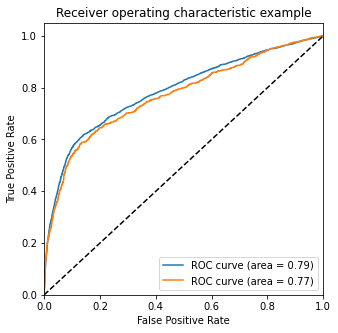

In [123]:
draw_roc(y_train, y_train_pred_rfe20_prob, y_test, y_test_pred_rfe20_prob)

In [45]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rfe20))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rfe20))

Accuracy train:  0.8997908223297163
Accuracy test:  0.9039090077134266


In [36]:
lr_model = LogisticRegression()
lr_param_grid = {
    'max_iter': [75, 100, 125],
    'penalty': ['l1', 'l2'],
    'C': [0.5 , 1, 1.5],
    'solver': ['liblinear', 'lbfgs']
}
print(lr_param_grid)

{'max_iter': [75, 100, 125], 'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5], 'solver': ['liblinear', 'lbfgs']}


In [37]:
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train, y_train)

In [38]:
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = \
                                    prediction_model(lr_grid, X_train, y_train, X_test, y_test)

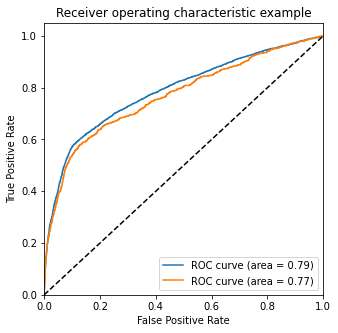

In [138]:
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [43]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_lr))

Accuracy train:  0.8996274022748072
Accuracy test:  0.9041704798012812


## Random Forests

In [47]:
# Create the param grid for random forest
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = [{'n_estimators': [30, 50, 75, 100],
               'max_depth': [5, 6, 7, 8, 9, 10],
               'max_features': [10, 15, 25, 30]}]
print(param_grid_rf)

[{'n_estimators': [30, 50, 75, 100], 'max_depth': [5, 6, 7, 8, 9, 10], 'max_features': [10, 15, 25, 30]}]


In [48]:
rf_model = RandomForestClassifier()

In [50]:
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', param_grid_rf, X_train, y_train)

In [51]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = \
                                    prediction_model(rf_grid, X_train, y_train, X_test, y_test)

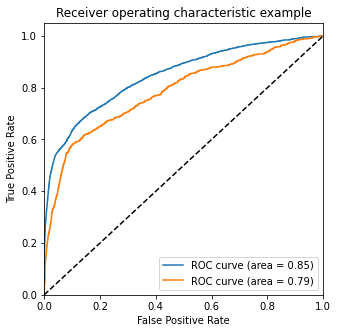

In [52]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [53]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rf))

Accuracy train:  0.9165577199633939
Accuracy test:  0.9043012158452085


## Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(verbose = 1)

In [55]:
params_grid_gb = {
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}

In [56]:
gb_grid = training_model_hyperparameter(gb_model, 'roc_auc', params_grid_gb, X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.6505            7.72s
         2           0.6247            8.48s
         3           0.6077            7.67s
         4           0.5957            7.01s
         5           0.5867            6.96s
         6           0.5790            6.77s
         7           0.5734            6.50s
         8           0.5695            6.74s
         9           0.5653            6.84s
        10           0.5628            6.64s
        20           0.5493            6.25s
        30           0.5442            5.23s
        40           0.5410            4.26s
        50           0.5384            3.50s


In [57]:
y_train_pred_gb, y_train_pred_gb_prob, y_test_pred_gb, y_test_pred_gb_prob = \
                                    prediction_model(gb_grid, X_train, y_train, X_test, y_test)

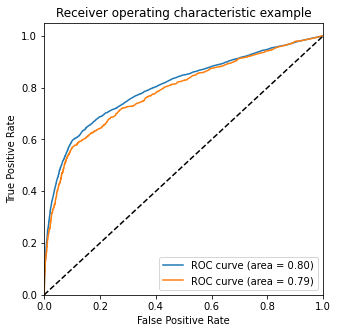

In [58]:
draw_roc(y_train, y_train_pred_gb_prob, y_test, y_test_pred_gb_prob)

In [62]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_gb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_gb))

Accuracy train:  0.9045300039220813
Accuracy test:  0.9065237285919728


## SVM

In [59]:
from sklearn.svm import SVC
svc_model = SVC()
params_grid_svc = {
    "kernel": ["linear", "rbf"],
    "degree": [1, 2]
}

In [60]:
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', params_grid_svc, X_train, y_train)

In [61]:
print("Accuracy train: ", accuracy_score(y_train, svc_grid.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_test, svc_grid.predict(X_test)))

Accuracy train:  0.9007059746372075
Accuracy test:  0.9035167995816447


## XGBoost Classifier

In [73]:
from xgboost import XGBClassifier

In [74]:
xgb_model = XGBClassifier()

In [75]:
# Create the param grid for random forest
param_grid_xgb = {
               'max_depth': [5, 7],
               'max_features': [10, 20, 30]}
print(param_grid_xgb)

{'max_depth': [5, 7], 'max_features': [10, 20, 30]}


In [76]:
xgb_grid = training_model_hyperparameter(xgb_model, 'roc_auc', param_grid_xgb, X_train, y_train)

[20:54:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:54:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
y_train_pred_xgb, y_train_pred_xgb_prob, y_test_pred_xgb, y_test_pred_xgb_prob = \
                                    prediction_model(xgb_grid, X_train, y_train, X_test, y_test)

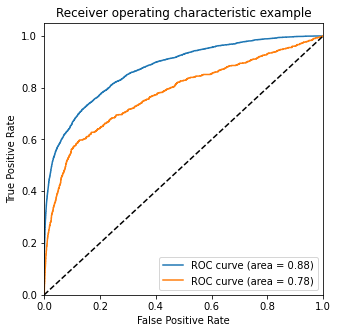

In [82]:
draw_roc(y_train, y_train_pred_xgb_prob, y_test, y_test_pred_xgb_prob)

In [83]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_xgb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_xgb))

Accuracy train:  0.9206432213361224
Accuracy test:  0.9044319518891358


## Compare Models

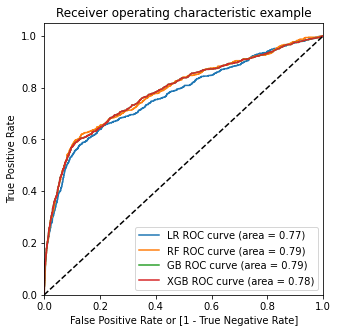

In [84]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve( y_test, y_test_pred_lr_prob,
                                              drop_intermediate = False )
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve( y_test, y_test_pred_rf_prob,
                                              drop_intermediate = False )
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve( y_test, y_test_pred_gb_prob,
                                              drop_intermediate = False )
xgb_fpr, xgb_tpr, xgb_thresholds = metrics.roc_curve( y_test, y_test_pred_xgb_prob,
                                              drop_intermediate = False )
lr_auc_score = metrics.roc_auc_score( y_test, y_test_pred_lr_prob )
rf_auc_score = metrics.roc_auc_score( y_test, y_test_pred_rf_prob )
gb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_gb_prob )
xgb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_xgb_prob )
plt.figure(figsize=(5, 5))
plt.plot( lr_fpr, lr_tpr, label='LR ROC curve (area = %0.2f)' % lr_auc_score )
plt.plot( rf_fpr, rf_tpr, label='RF ROC curve (area = %0.2f)' % rf_auc_score )
plt.plot( gb_fpr, gb_tpr, label='GB ROC curve (area = %0.2f)' % gb_auc_score )
plt.plot( gb_fpr, gb_tpr, label='XGB ROC curve (area = %0.2f)' % xgb_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()